## Importing the useful libraries for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn .metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


## Reading, understanding and visualising the data

In [2]:
# Data read from folder and display the sample of data
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Printing shape, null rows and null columns count
print('Shape of Data: ',bikes.shape)
print('Total Null rows: ',bikes.isnull().all(axis=1).sum())
print('Total Null Columns: ',(bikes.isna().sum()==bikes.shape[0]).sum())

Shape of Data:  (730, 16)
Total Null rows:  0
Total Null Columns:  0


In [5]:
#stastically summary of data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Deleting unnecessary columns : columns which are irrelevant
**instant**: This is irrelevant as it is just the numbering of rach row <br>
**dteday**: not required for analyses as year and month is already extracted from it and given as a separate column and day is not useful for our analysis <br>
**casual**: a separate count of casual user is not required <br>
**registered**: a separate count of registered user is not required <br>

In [4]:
# code for dropping columns 
bikes = bikes.drop(['instant','dteday','casual','registered'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
# Renaming few columns for better understanding 
bikes.rename(columns={'yr':'year','mnth':'month','hum':"humidity",'cnt':'total_count'}, inplace=True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
print('Shape of Data: ',bikes.shape)

Shape of Data:  (730, 12)


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   year         730 non-null    int64  
 2   month        730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    int64  
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  total_count  730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Visualising the data

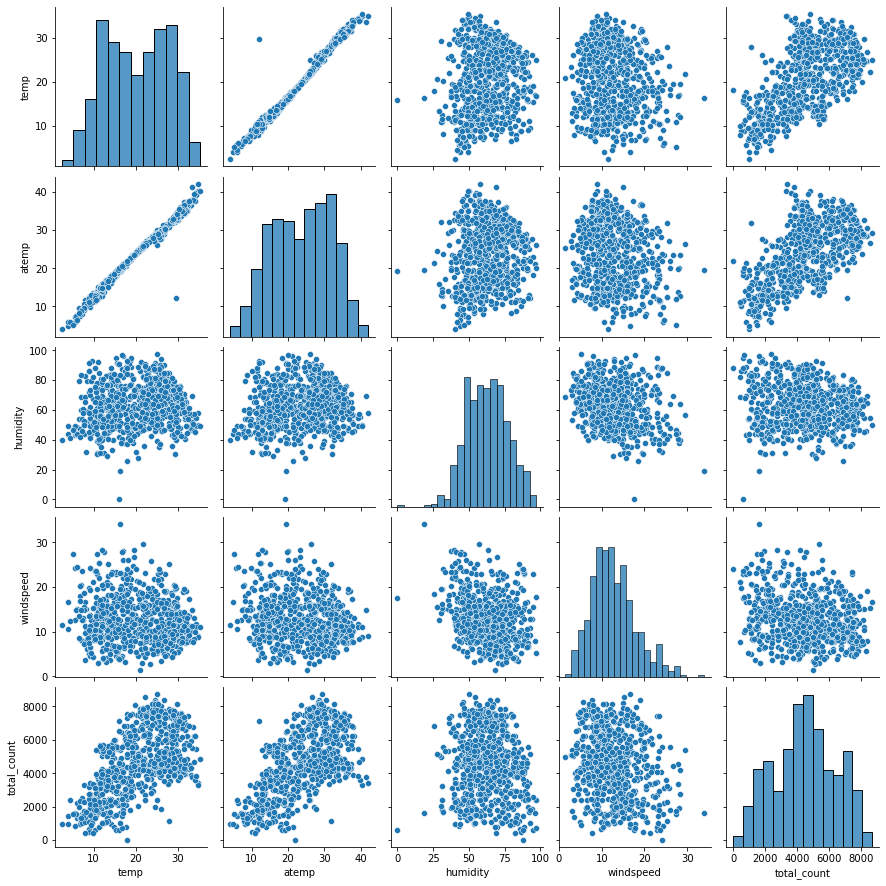

In [8]:
# visualising numerical variables
sns.pairplot(bikes[['temp','atemp','humidity','windspeed','total_count']])
plt.show()

### Insights from above plots for numerical variables
1. temp and atemp are highly correlated infact both the graphs are similar.There is a linear relationship between them
2. target variable total_count shows linear relationship with temp and atemp which tells if the temp or atemp increases, the total count of bikes increases
3. When humidity increases after 40, more people prefers to take rented bikes
4. windspeed greater than 25 results in less rented bikes. 


Dropping 'temp' as it is highly correlated with 'atemp' and user prefers to go outside depending upon how user feels the temperature to be 


In [9]:
# code for dropping temp 
bikes = bikes.drop(['temp'], axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


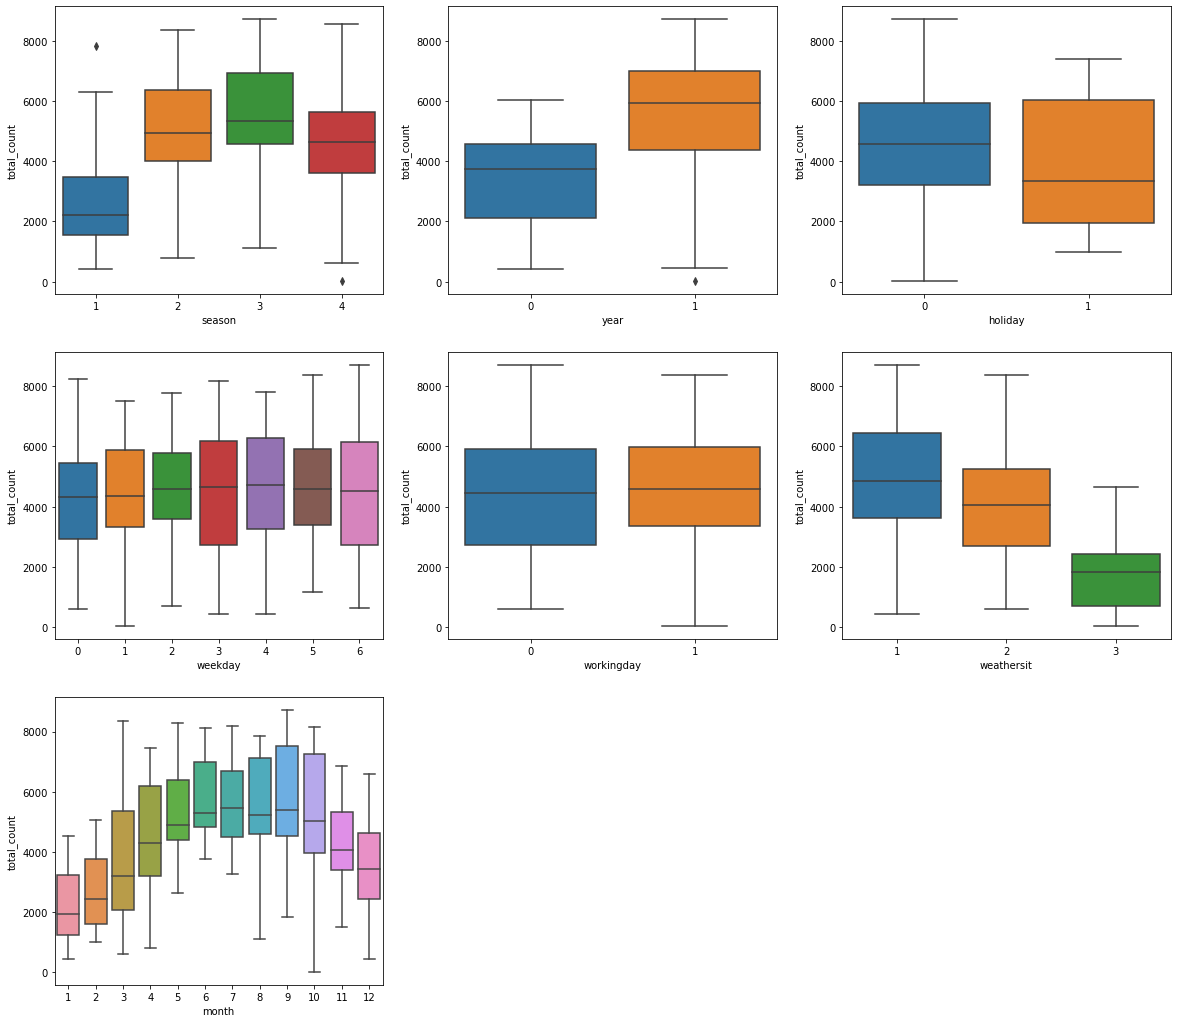

In [10]:
# visualising categorical variables
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='total_count', data=bikes) 
plt.subplot(3,3,2)
sns.boxplot(x='year', y='total_count', data=bikes) 
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='total_count', data=bikes) 
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='total_count', data=bikes) 
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='total_count', data=bikes) 
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='total_count', data=bikes) 
plt.subplot(3,3,7)
sns.boxplot(x='month', y='total_count', data=bikes) 

plt.show()

### Insights from above box plots for categorical variables

**season:** Majority of the user prefer to rent a bike in fall season (season_3) because fall is the season between summer and winter and the temperature is moderate, so user prefer to rent a bike in fall season <br>
**year:** Number of user renting bike in 2019 is more compared to 2018. As in the initial year for any new company, the growth increases. So, the count in 2019 has increases as compared to 2018 <br>
**holiday:** More people are renting bikes when it is a holiday to enjoy the time with family and friends <br>
**weekday:** on day 3, the count of bikes for rent is usually more compared to another weekday because it is the mid-day of the week and user go to office and hence rents a bike <br>
**wokingday:** when it is not a working day, the count of bikes for rent is usually more compared to a working day <br>
**weathersit:** when it is Clear, Few clouds or Partly cloudy, the bikes for rent is more <br>
**month:** Majority of the bikes are being rented on the month of August-September compared to other months   <br>


## Preparing data for modelling (encoding, rescaling, train-test split)

### Dummy variables for categorical variables

In [11]:
# Get the dummy variables for categorical variables
bikes = pd.get_dummies(bikes, columns= ['season','weekday','weathersit','month'], drop_first=True) 
bikes.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print('Shape of Data: ',bikes.shape)

Shape of Data:  (730, 29)


### Splitting into train and test

In [13]:
df_train,df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling on numeric variables

In [14]:
# Rescaling on numeric variables: Min-Max scaling
scaler = StandardScaler()
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1,0,1,1.193181,0.515796,-0.331282,7216,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,-0.349583,-0.070634,-0.386359,4066,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,-1.474112,-1.046051,2.017388,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,-0.572197,-1.001847,-0.780539,4220,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,-0.915819,0.695551,0.354275,1683,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Training the model

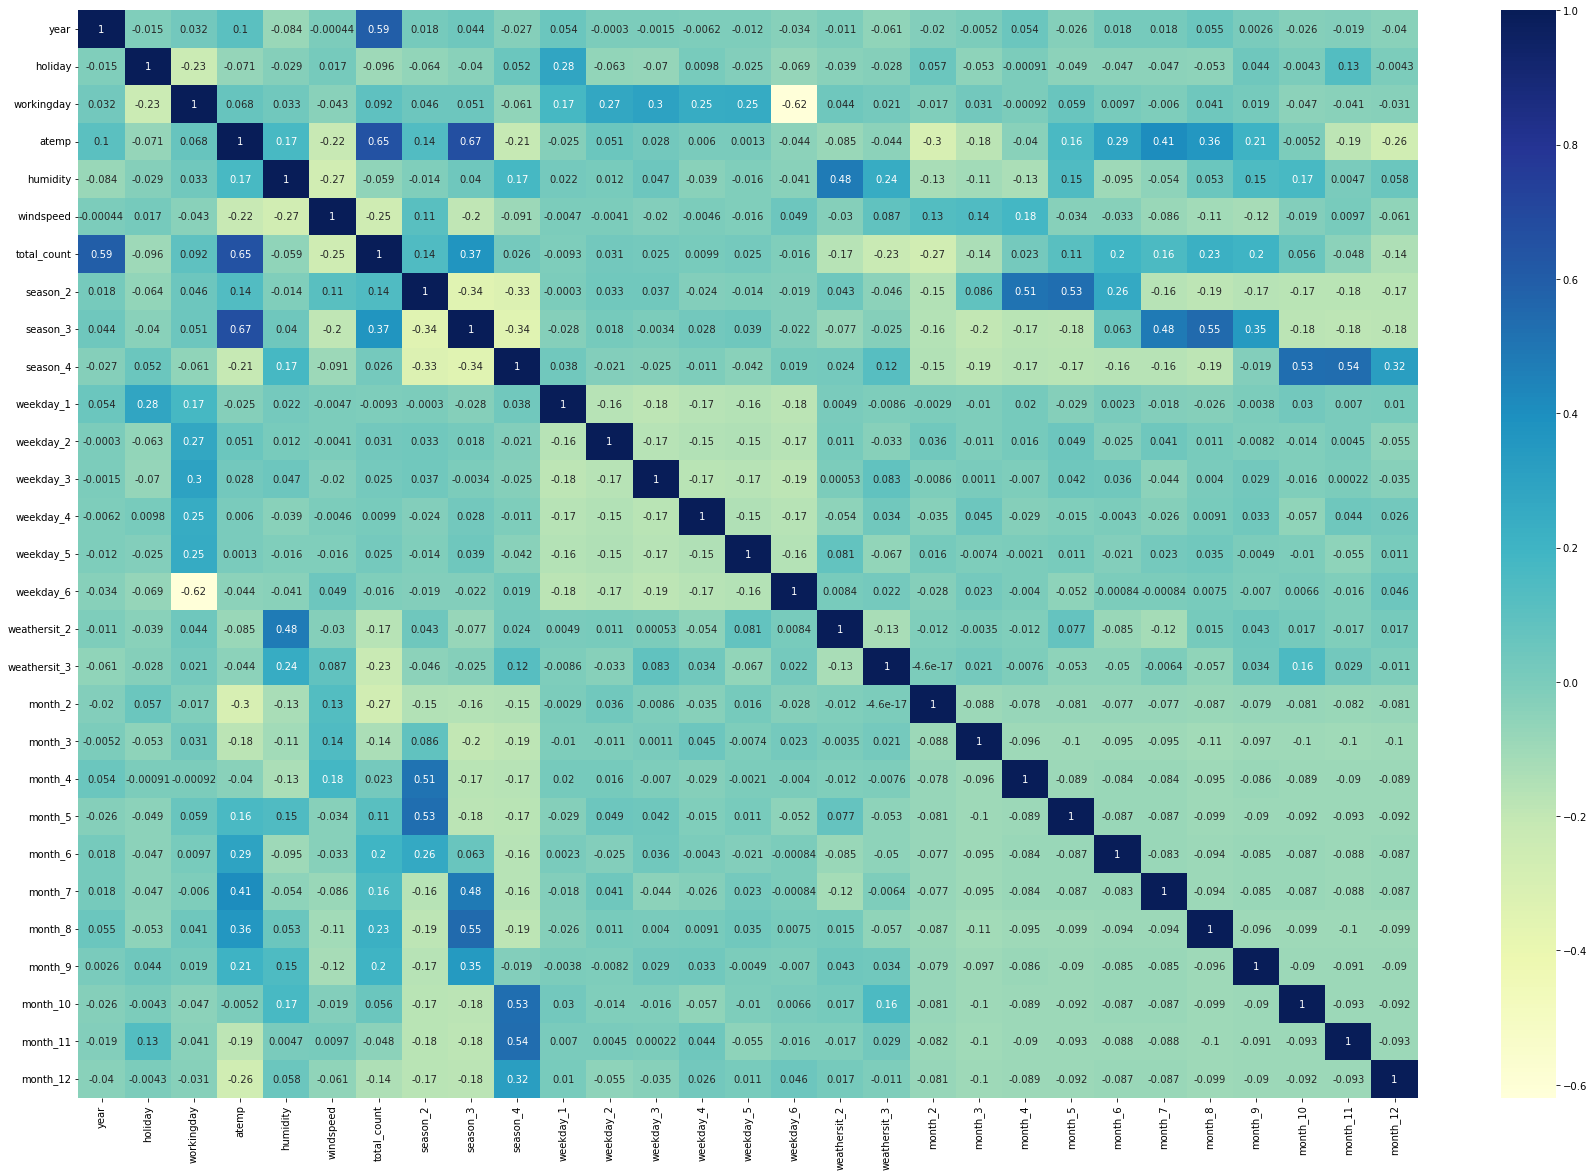

In [15]:
# Heatmap to see correlation of all the variables
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [16]:
# building the model 
y_train = df_train.pop('total_count')
X_train = df_train

## 1st Model with all the variables

In [17]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.07e-179
Time:                        14:35:53   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2109.5996    193.934     10.878      0.000    1728.539    2490.660
year          2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday       -311.4626    206.370     -1.509      0.132    -716.958      94.033
workingday     376.9501     82.044      4.594      0.000     215.742     538.158
atemp          767.3741     83.648      9.174      0.000     603.014     931.734
humidity      -184.7831     49.133     -3.761      0.000    -281.325     -88.241
windspeed     -248.2007     38.253     -6.488      0.000    -323.364    -173.038
season_2       753.9253    206.721      3.647      0.000     347.740    1160.111
season_3       451.3037    261.814      1.724      0.085     -63.135     965.742
season_4      1333.5901    227.339      5.866      0.000     886.893    1780.287
weekday_1      -95.5067     85.166     -1.121      0.263    -262.848      71.835
weekday_2      -52.9501     97.687     -0.542      0.588    -244.896     138.995
weekday_3       61.7502     92.008      0.671      0.502    -119.035     242.536
weekday_4       19.2401     95.703      0.201      0.841    -168.806     207.286
weekday_5      132.9541     97.547      1.363      0.174     -58.716     324.625
weekday_6      472.8253    127.229      3.716      0.000     222.834     722.817
weathersit_2  -531.6674     91.194     -5.830      0.000    -710.854    -352.481
weathersit_3 -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
month_2        288.4629    180.512      1.598      0.111     -66.225     643.151
month_3        636.3368    193.930      3.281      0.001     255.284    1017.390
month_4        639.3278    292.217      2.188      0.029      65.150    1213.505
month_5        954.5878    309.593      3.083      0.002     346.268    1562.907
month_6        849.9669    327.548      2.595      0.010     206.369    1493.565
month_7        511.6220    373.335      1.370      0.171    -221.944    1245.188
month_8       1003.3390    353.444      2.839      0.005     308.858    1697.820
month_9       1470.7794    321.285      4.578      0.000     839.488    2102.071
month_10       705.4403    300.183      2.350      0.019     115.612    1295.268
month_11       242.0312    287.236      0.843      0.400    -322.358     806.421
month_12       181.9869    231.997      0.784      0.433    -273.863     637.837
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     8.39e+15
==============================================================================

Notes:
[1] Stand

In [18]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weekday_3,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
12,weekday_4,inf
13,weekday_5,inf
1,holiday,inf
7,season_3,15.22
8,season_4,10.82
6,season_2,8.95


## 2nd Model

In [19]:
# dropping weekday_4 having high p and VIF value
X = X_train.drop('weekday_4',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.07e-179
Time:                        14:35:57   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2109.5996    193.934     10.878      0.000    1728.539    2490.660
year          2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday       -292.2225    262.474     -1.113      0.266    -807.957     223.512
workingday     396.1901    132.764      2.984      0.003     135.323     657.057
atemp          767.3741     83.648      9.174      0.000     603.014     931.734
humidity      -184.7831     49.133     -3.761      0.000    -281.325     -88.241
windspeed     -248.2007     38.253     -6.488      0.000    -323.364    -173.038
season_2       753.9253    206.721      3.647      0.000     347.740    1160.111
season_3       451.3037    261.814      1.724      0.085     -63.135     965.742
season_4      1333.5901    227.339      5.866      0.000     886.893    1780.287
weekday_1     -114.7468    132.466     -0.866      0.387    -375.029     145.535
weekday_2      -72.1902    135.052     -0.535      0.593    -337.554     193.173
weekday_3       42.5101    128.481      0.331      0.741    -209.942     294.962
weekday_5      113.7140    136.221      0.835      0.404    -153.946     381.374
weekday_6      472.8253    127.229      3.716      0.000     222.834     722.817
weathersit_2  -531.6674     91.194     -5.830      0.000    -710.854    -352.481
weathersit_3 -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
month_2        288.4629    180.512      1.598      0.111     -66.225     643.151
month_3        636.3368    193.930      3.281      0.001     255.284    1017.390
month_4        639.3278    292.217      2.188      0.029      65.150    1213.505
month_5        954.5878    309.593      3.083      0.002     346.268    1562.907
month_6        849.9669    327.548      2.595      0.010     206.369    1493.565
month_7        511.6220    373.335      1.370      0.171    -221.944    1245.188
month_8       1003.3390    353.444      2.839      0.005     308.858    1697.820
month_9       1470.7794    321.285      4.578      0.000     839.488    2102.071
month_10       705.4403    300.183      2.350      0.019     115.612    1295.268
month_11       242.0312    287.236      0.843      0.400    -322.358     806.421
month_12       181.9869    231.997      0.784      0.433    -273.863     637.837
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [20]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,15.22
8,season_4,10.82
6,season_2,8.95
2,workingday,8.81
22,month_8,7.49
21,month_7,6.32
23,month_9,5.24
25,month_11,5.16
24,month_10,4.99
19,month_5,4.67


## 3rd model

In [21]:
# dropping weekday_3 having high p value
X = X.drop('weekday_3',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.09e-180
Time:                        14:35:58   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     483   BIC:                             8374.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2108.5820    193.731     10.884      0.000    1727.922    2489.241
year          2037.4795     70.346     28.964      0.000    1899.257    2175.702
holiday       -272.2987    255.237     -1.067      0.287    -773.812     229.214
workingday     419.5137    112.400      3.732      0.000     198.661     640.366
atemp          766.8123     83.554      9.177      0.000     602.638     930.986
humidity      -184.2011     49.056     -3.755      0.000    -280.592     -87.811
windspeed     -248.2706     38.217     -6.496      0.000    -323.363    -173.178
season_2       752.7086    206.497      3.645      0.000     346.964    1158.453
season_3       448.3557    261.421      1.715      0.087     -65.308     962.019
season_4      1333.6147    227.129      5.872      0.000     887.332    1779.898
weekday_1     -137.5484    113.024     -1.217      0.224    -359.628      84.531
weekday_2      -95.5119    115.092     -0.830      0.407    -321.655     130.631
weekday_5       90.5579    116.760      0.776      0.438    -138.862     319.978
weekday_6      473.0075    127.110      3.721      0.000     223.250     722.765
weathersit_2  -531.3721     91.105     -5.833      0.000    -710.384    -352.361
weathersit_3 -2197.9309    231.328     -9.501      0.000   -2652.465   -1743.397
month_2        289.7943    180.301      1.607      0.109     -64.477     644.066
month_3        636.2223    193.751      3.284      0.001     255.523    1016.921
month_4        642.0524    291.832      2.200      0.028      68.635    1215.469
month_5        957.8177    309.154      3.098      0.002     350.365    1565.271
month_6        854.2453    326.991      2.612      0.009     211.746    1496.745
month_7        515.7537    372.782      1.384      0.167    -216.722    1248.229
month_8       1007.2728    352.918      2.854      0.005     313.828    1700.717
month_9       1473.6868    320.868      4.593      0.000     843.217    2104.157
month_10       706.7483    299.880      2.357      0.019     117.518    1295.978
month_11       241.4457    286.966      0.841      0.401    -322.410     805.301
month_12       180.5282    231.741      0.779      0.436    -274.817     635.873
==============================================================================
Omnibus:                       86.057   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.734
Skew:                          -0.791   Prob(JB):                     2.41e-57
Kurtosis:                       6.126   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,15.20
8,season_4,10.82
6,season_2,8.95
21,month_8,7.48
20,month_7,6.31
2,workingday,6.02
22,month_9,5.23
24,month_11,5.16
23,month_10,4.99
18,month_5,4.67


## 4th Model

In [23]:
# dropping month_11 with high p and VIF value
X = X.drop('month_11',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.46e-181
Time:                        14:36:00   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     484   BIC:                             8368.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2170.6707    179.072     12.122      0.000    1818.817    2522.525
year          2034.2227     70.218     28.970      0.000    1896.252    2172.193
holiday       -254.5797    254.290     -1.001      0.317    -754.229     245.070
workingday     418.4276    112.358      3.724      0.000     197.657     639.198
atemp          780.2517     81.988      9.517      0.000     619.155     941.348
humidity      -184.7865     49.037     -3.768      0.000    -281.138     -88.435
windspeed     -244.5689     37.951     -6.444      0.000    -319.139    -169.999
season_2       791.7303    201.161      3.936      0.000     396.473    1186.987
season_3       531.2378    242.078      2.194      0.029      55.584    1006.892
season_4      1483.2249    141.269     10.499      0.000    1205.649    1760.801
weekday_1     -142.9793    112.805     -1.267      0.206    -364.628      78.669
weekday_2      -96.8377    115.047     -0.842      0.400    -322.890     129.215
weekday_5       88.7463    116.705      0.760      0.447    -140.565     318.057
weekday_6      471.0935    127.051      3.708      0.000     221.453     720.734
weathersit_2  -532.5703     91.067     -5.848      0.000    -711.505    -353.636
weathersit_3 -2193.8330    231.207     -9.489      0.000   -2648.127   -1739.539
month_2        243.6343    171.700      1.419      0.157     -93.735     581.003
month_3        569.7145    176.840      3.222      0.001     222.246     917.183
month_4        544.4067    267.682      2.034      0.043      18.444    1070.370
month_5        854.4613    283.615      3.013      0.003     297.193    1411.730
month_6        728.0961    290.503      2.506      0.013     157.293    1298.899
month_7        356.8386    321.295      1.111      0.267    -274.466     988.143
month_8        853.4621    301.790      2.828      0.005     260.482    1446.442
month_9       1309.8641    254.962      5.137      0.000     808.894    1810.834
month_10       499.2423    170.544      2.927      0.004     164.145     834.340
month_12        30.2143    147.560      0.205      0.838    -259.723     320.151
==============================================================================
Omnibus:                       84.172   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.956
Skew:                          -0.776   Prob(JB):                     1.18e-55
Kurtosis:                       6.082   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,12.36
6,season_2,8.45
21,month_8,6.25
2,workingday,5.84
20,month_7,5.38
18,month_5,4.40
19,month_6,4.03
17,month_4,4.02
22,month_9,3.82
3,atemp,3.67


## 5th Model

In [25]:
# dropping month_12 having high p value
X = X.drop('month_12',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.38e-182
Time:                        14:36:01   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     485   BIC:                             8362.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2178.3919    174.883     12.456      0.000    1834.769    2522.015
year          2033.9498     70.136     29.000      0.000    1896.141    2171.759
holiday       -257.9040    253.521     -1.017      0.310    -756.039     240.231
workingday     418.4391    112.247      3.728      0.000     197.888     638.990
atemp          780.4340     81.902      9.529      0.000     619.507     941.361
humidity      -184.1175     48.879     -3.767      0.000    -280.159     -88.076
windspeed     -244.7344     37.905     -6.456      0.000    -319.213    -170.255
season_2       792.8649    200.886      3.947      0.000     398.150    1187.579
season_3       534.1029    241.435      2.212      0.027      59.716    1008.490
season_4      1487.9556    139.229     10.687      0.000    1214.389    1761.522
weekday_1     -142.5125    112.671     -1.265      0.207    -363.896      78.871
weekday_2      -97.3692    114.904     -0.847      0.397    -323.140     128.401
weekday_5       89.6502    116.506      0.769      0.442    -139.269     318.569
weekday_6      472.0188    126.846      3.721      0.000     222.784     721.254
weathersit_2  -533.3858     90.890     -5.869      0.000    -711.972    -354.800
weathersit_3 -2195.4023    230.852     -9.510      0.000   -2648.995   -1741.809
month_2        236.9348    168.387      1.407      0.160     -93.923     567.792
month_3        562.1719    172.790      3.254      0.001     222.663     901.681
month_4        536.2753    264.459      2.028      0.043      16.649    1055.902
month_5        845.4989    279.940      3.020      0.003     295.454    1395.544
month_6        718.6887    286.564      2.508      0.012     155.629    1281.749
month_7        346.1301    316.696      1.093      0.275    -276.136     968.397
month_8        842.6821    296.869      2.839      0.005     259.375    1425.990
month_9       1298.7874    248.911      5.218      0.000     809.710    1787.865
month_10       486.8173    159.226      3.057      0.002     173.960     799.675
==============================================================================
Omnibus:                       84.423   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.016
Skew:                          -0.778   Prob(JB):                     6.94e-56
Kurtosis:                       6.088   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,12.20
6,season_2,8.44
21,month_8,6.19
2,workingday,5.78
20,month_7,5.34
18,month_5,4.39
19,month_6,4.02
17,month_4,4.00
22,month_9,3.74
3,atemp,3.59


## 6th Model

In [27]:
# dropping weekday_5 having high p value
X = X.drop('weekday_5',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.67e-183
Time:                        14:36:02   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     486   BIC:                             8356.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2172.2804    174.630     12.439      0.000    1829.158    2515.403
year          2033.4850     70.104     29.007      0.000    1895.740    2171.230
holiday       -228.5096    250.521     -0.912      0.362    -720.748     263.729
workingday     446.1426    106.272      4.198      0.000     237.333     654.952
atemp          777.4109     81.774      9.507      0.000     616.737     938.085
humidity      -184.9472     48.847     -3.786      0.000    -280.924     -88.970
windspeed     -244.9471     37.888     -6.465      0.000    -319.393    -170.502
season_2       790.5271    200.779      3.937      0.000     396.025    1185.029
season_3       534.3654    241.333      2.214      0.027      60.180    1008.550
season_4      1488.4149    139.169     10.695      0.000    1214.967    1761.862
weekday_1     -170.1014    106.769     -1.593      0.112    -379.888      39.685
weekday_2     -125.2330    109.003     -1.149      0.251    -339.409      88.943
weekday_6      472.1795    126.792      3.724      0.000     223.051     721.308
weathersit_2  -528.3280     90.613     -5.831      0.000    -706.371    -350.285
weathersit_3 -2208.3645    230.140     -9.596      0.000   -2660.556   -1756.173
month_2        240.8073    168.241      1.431      0.153     -89.762     571.377
month_3        564.3185    172.695      3.268      0.001     224.998     903.639
month_4        543.7745    264.168      2.058      0.040      24.722    1062.827
month_5        853.4216    279.633      3.052      0.002     303.982    1402.861
month_6        725.3002    286.315      2.533      0.012     162.733    1287.868
month_7        359.6753    316.074      1.138      0.256    -261.365     980.716
month_8        851.9616    296.499      2.873      0.004     269.383    1434.540
month_9       1303.1276    248.743      5.239      0.000     814.383    1791.872
month_10       494.0401    158.882      3.109      0.002     181.859     806.221
==============================================================================
Omnibus:                       83.754   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.370
Skew:                          -0.768   Prob(JB):                     5.81e-56
Kurtosis:                       6.100   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,12.20
6,season_2,8.44
20,month_8,6.18
19,month_7,5.33
2,workingday,5.12
17,month_5,4.38
18,month_6,4.02
16,month_4,4.00
21,month_9,3.74
3,atemp,3.58


## 7th Model

In [29]:
# dropping month_7 having high p and VIF value
X = X.drop('month_7',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.80e-184
Time:                        14:36:03   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     487   BIC:                             8351.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2256.7959    158.097     14.275      0.000    1946.160    2567.432
year          2029.8176     70.052     28.976      0.000    1892.177    2167.458
holiday       -259.4492    249.117     -1.041      0.298    -748.925     230.027
workingday     439.4347    106.141      4.140      0.000     230.884     647.985
atemp          827.7955     68.770     12.037      0.000     692.672     962.919
humidity      -192.9290     48.355     -3.990      0.000    -287.940     -97.918
windspeed     -245.1646     37.899     -6.469      0.000    -319.631    -170.698
season_2       865.8711    189.605      4.567      0.000     493.326    1238.416
season_3       685.2079    201.730      3.397      0.001     288.840    1081.576
season_4      1460.7543    137.071     10.657      0.000    1191.430    1730.079
weekday_1     -165.9858    106.740     -1.555      0.121    -375.714      43.742
weekday_2     -120.8015    108.967     -1.109      0.268    -334.904      93.301
weekday_6      472.3208    126.831      3.724      0.000     223.118     721.523
weathersit_2  -521.5330     90.444     -5.766      0.000    -699.241    -343.825
weathersit_3 -2194.9496    229.907     -9.547      0.000   -2646.682   -1743.217
month_2        212.9107    166.496      1.279      0.202    -114.228     540.049
month_3        480.0768    156.070      3.076      0.002     173.424     786.730
month_4        390.9488    227.552      1.718      0.086     -56.155     838.053
month_5        672.8959    230.347      2.921      0.004     220.300    1125.492
month_6        488.3188    196.545      2.485      0.013     102.138     874.500
month_8        565.6747    156.949      3.604      0.000     257.294     874.056
month_9       1079.3886    152.411      7.082      0.000     779.925    1378.852
month_10       443.5149    152.598      2.906      0.004     143.683     743.347
==============================================================================
Omnibus:                       80.711   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.811
Skew:                          -0.746   Prob(JB):                     5.11e-53
Kurtosis:                       6.018   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_2,7.06
7,season_3,5.32
2,workingday,4.96
17,month_5,3.46
16,month_4,3.31
3,atemp,3.03
8,season_4,2.54
12,weathersit_2,2.38
18,month_6,2.28
19,month_8,2.01


## 8th Model

In [31]:
# dropping weekday_2 having high p value
X = X.drop('weekday_2',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.45e-185
Time:                        14:36:04   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     488   BIC:                             8346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2258.3357    158.128     14.282      0.000    1947.640    2569.031
year          2029.8983     70.068     28.970      0.000    1892.226    2167.570
holiday       -281.1455    248.405     -1.132      0.258    -769.221     206.930
workingday     409.8824    102.763      3.989      0.000     207.970     611.795
atemp          825.3907     68.752     12.005      0.000     690.304     960.478
humidity      -194.1391     48.354     -4.015      0.000    -289.148     -99.131
windspeed     -245.8793     37.903     -6.487      0.000    -320.352    -171.406
season_2       861.5853    189.610      4.544      0.000     489.032    1234.138
season_3       682.5774    201.763      3.383      0.001     286.145    1079.009
season_4      1457.1906    137.066     10.631      0.000    1187.878    1726.503
weekday_1     -137.9958    103.736     -1.330      0.184    -341.819      65.828
weekday_6      471.0612    126.855      3.713      0.000     221.811     720.311
weathersit_2  -520.0886     90.456     -5.750      0.000    -697.819    -342.358
weathersit_3 -2181.9377    229.661     -9.501      0.000   -2633.185   -1730.691
month_2        202.6667    166.278      1.219      0.223    -124.043     529.376
month_3        480.7143    156.105      3.079      0.002     173.993     787.436
month_4        390.0756    227.604      1.714      0.087     -57.129     837.280
month_5        673.7803    230.400      2.924      0.004     221.083    1126.478
month_6        496.0627    196.467      2.525      0.012     110.037     882.088
month_8        570.0256    156.937      3.632      0.000     261.670     878.381
month_9       1084.7306    152.370      7.119      0.000     785.348    1384.113
month_10       443.3571    152.634      2.905      0.004     143.456     743.258
==============================================================================
Omnibus:                       81.020   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.560
Skew:                          -0.740   Prob(JB):                     1.06e-54
Kurtosis:                       6.084   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_2,7.06
7,season_3,5.32
2,workingday,4.57
16,month_5,3.46
15,month_4,3.31
3,atemp,3.02
8,season_4,2.54
11,weathersit_2,2.38
17,month_6,2.28
18,month_8,2.01


## 9th Model

In [33]:
# dropping month_2 with high p value
X = X.drop('month_2',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.83e-186
Time:                        14:36:05   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     489   BIC:                             8342.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2334.4220    145.356     16.060      0.000    2048.822    2620.022
year          2029.2068     70.100     28.947      0.000    1891.472    2166.942
holiday       -279.7342    248.526     -1.126      0.261    -768.044     208.576
workingday     408.3538    102.806      3.972      0.000     206.357     610.350
atemp          829.4738     68.705     12.073      0.000     694.481     964.467
humidity      -197.7885     48.286     -4.096      0.000    -292.661    -102.916
windspeed     -242.7885     37.837     -6.417      0.000    -317.131    -168.446
season_2       832.6444    188.211      4.424      0.000     462.843    1202.446
season_3       611.6058    193.274      3.164      0.002     231.856     991.356
season_4      1386.5829    124.284     11.157      0.000    1142.387    1630.779
weekday_1     -139.0363    103.784     -1.340      0.181    -342.953      64.880
weekday_6      463.6122    126.771      3.657      0.000     214.530     712.695
weathersit_2  -518.3170     90.489     -5.728      0.000    -696.112    -340.522
weathersit_3 -2167.9426    229.488     -9.447      0.000   -2618.847   -1717.038
month_3        416.4708    147.011      2.833      0.005     127.620     705.321
month_4        341.6739    224.224      1.524      0.128     -98.887     782.235
month_5        628.0428    227.436      2.761      0.006     181.171    1074.915
month_6        461.3571    194.489      2.372      0.018      79.220     843.495
month_8        564.2803    156.944      3.595      0.000     255.913     872.648
month_9       1081.0405    152.416      7.093      0.000     781.570    1380.511
month_10       440.4799    152.691      2.885      0.004     140.468     740.492
==============================================================================
Omnibus:                       81.346   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.208
Skew:                          -0.745   Prob(JB):                     1.27e-54
Kurtosis:                       6.076   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_2,7.06
7,season_3,5.31
2,workingday,4.32
15,month_5,3.45
14,month_4,3.28
3,atemp,2.92
8,season_4,2.37
11,weathersit_2,2.37
16,month_6,2.28
17,month_8,2.01


## 10th Model

In [35]:
# dropping holiday having high p value
X = X.drop('holiday',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.20e-186
Time:                        14:36:06   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     490   BIC:                             8337.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2288.4394    139.535     16.400      0.000    2014.278    2562.601
year          2031.8644     70.080     28.994      0.000    1894.171    2169.558
workingday     452.8192     94.939      4.770      0.000     266.281     639.357
atemp          827.5678     68.703     12.046      0.000     692.580     962.556
humidity      -196.0198     48.273     -4.061      0.000    -290.868    -101.172
windspeed     -243.2264     37.845     -6.427      0.000    -317.585    -168.868
season_2       836.4092    188.232      4.443      0.000     466.567    1206.251
season_3       622.5205    193.083      3.224      0.001     243.147    1001.894
season_4      1388.8163    124.302     11.173      0.000    1144.586    1633.047
weekday_1     -176.9095     98.204     -1.801      0.072    -369.863      16.044
weekday_6      501.3994    122.278      4.100      0.000     261.145     741.653
weathersit_2  -517.9357     90.513     -5.722      0.000    -695.777    -340.094
weathersit_3 -2167.8913    229.550     -9.444      0.000   -2618.916   -1716.867
month_3        425.8742    146.813      2.901      0.004     137.413     714.335
month_4        346.9422    224.236      1.547      0.122     -93.641     787.525
month_5        635.7296    227.395      2.796      0.005     188.940    1082.520
month_6        471.2096    194.345      2.425      0.016      89.357     853.062
month_8        565.1009    156.985      3.600      0.000     256.654     873.548
month_9       1071.6429    152.228      7.040      0.000     772.542    1370.743
month_10       449.3149    152.531      2.946      0.003     149.619     749.011
==============================================================================
Omnibus:                       85.904   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.041
Skew:                          -0.778   Prob(JB):                     3.79e-59
Kurtosis:                       6.200   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_2,7.04
6,season_3,5.18
1,workingday,3.96
14,month_5,3.44
13,month_4,3.27
2,atemp,2.85
10,weathersit_2,2.37
7,season_4,2.32
15,month_6,2.28
16,month_8,2.01


## 11th Model

In [37]:
# dropping month_4 having high p value
X = X.drop('month_4',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.16e-187
Time:                        14:36:06   Log-Likelihood:                -4107.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     491   BIC:                             8333.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2321.5217    138.083     16.813      0.000    2050.215    2592.828
year          2034.2098     70.163     28.993      0.000    1896.354    2172.066
workingday     452.8956     95.074      4.764      0.000     266.094     639.697
atemp          837.4706     68.501     12.226      0.000     702.880     972.061
humidity      -202.5405     48.157     -4.206      0.000    -297.160    -107.921
windspeed     -238.3186     37.765     -6.311      0.000    -312.520    -164.117
season_2      1040.4546    134.501      7.736      0.000     776.185    1304.724
season_3       617.4872    193.330      3.194      0.001     237.632     997.343
season_4      1364.8493    123.508     11.051      0.000    1122.180    1607.518
weekday_1     -177.3186     98.343     -1.803      0.072    -370.544      15.907
weekday_6      497.6720    122.428      4.065      0.000     257.125     738.219
weathersit_2  -515.8626     90.631     -5.692      0.000    -693.936    -337.789
weathersit_3 -2161.8306    229.843     -9.406      0.000   -2613.427   -1710.234
month_3        318.9470    129.714      2.459      0.014      64.085     573.809
month_5        395.2868    166.243      2.378      0.018      68.652     721.922
month_6        296.3245    158.318      1.872      0.062     -14.740     607.390
month_8        527.3152    155.294      3.396      0.001     222.193     832.437
month_9       1044.4346    151.424      6.897      0.000     746.916    1341.953
month_10       442.3298    152.681      2.897      0.004     142.342     742.318
==============================================================================
Omnibus:                       87.216   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.876
Skew:                          -0.791   Prob(JB):                     5.57e-60
Kurtosis:                       6.216   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.13
1,workingday,3.93
5,season_2,2.91
2,atemp,2.85
10,weathersit_2,2.36
7,season_4,2.31
3,humidity,1.96
15,month_8,1.96
0,year,1.93
13,month_5,1.87


## 12th Model 

In [39]:
# dropping weekday_1 having high VIF value
X = X.drop('weekday_1',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.23e-187
Time:                        14:36:07   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     492   BIC:                             8330.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2306.4842    138.146     16.696      0.000    2035.056    2577.913
year          2027.3996     70.221     28.872      0.000    1889.430    2165.370
workingday     437.5461     94.908      4.610      0.000     251.071     624.021
atemp          841.3307     68.624     12.260      0.000     706.499     976.162
humidity      -205.8435     48.232     -4.268      0.000    -300.610    -111.077
windspeed     -238.9219     37.850     -6.312      0.000    -313.290    -164.554
season_2      1033.5586    134.754      7.670      0.000     768.794    1298.323
season_3       613.0104    193.755      3.164      0.002     232.320     993.701
season_4      1360.4839    123.766     10.992      0.000    1117.308    1603.660
weekday_6      517.0110    122.236      4.230      0.000     276.843     757.179
weathersit_2  -512.0946     90.814     -5.639      0.000    -690.526    -333.663
weathersit_3 -2149.5865    230.267     -9.335      0.000   -2602.015   -1697.158
month_3        322.0867    129.998      2.478      0.014      66.667     577.507
month_5        407.4555    166.485      2.447      0.015      80.346     734.565
month_6        295.5510    158.680      1.863      0.063     -16.222     607.324
month_8        531.9542    155.627      3.418      0.001     226.178     837.730
month_9       1046.0967    151.767      6.893      0.000     747.906    1344.288
month_10       437.0660    153.001      2.857      0.004     136.449     737.683
==============================================================================
Omnibus:                       87.051   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.920
Skew:                          -0.784   Prob(JB):                     7.37e-61
Kurtosis:                       6.252   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.11
1,workingday,3.86
5,season_2,2.89
2,atemp,2.84
9,weathersit_2,2.36
7,season_4,2.30
3,humidity,1.96
14,month_8,1.96
0,year,1.92
12,month_5,1.87


## 13th Model

In [41]:
# dropping month_6 with high p value
X = X.drop('month_6',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.21e-188
Time:                        14:36:09   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     493   BIC:                             8328.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2364.5228    134.922     17.525      0.000    2099.429    2629.616
year          2020.3562     70.295     28.741      0.000    1882.242    2158.470
workingday     439.7713     95.138      4.622      0.000     252.845     626.697
atemp          884.5091     64.751     13.660      0.000     757.287    1011.731
humidity      -212.8019     48.207     -4.414      0.000    -307.519    -118.084
windspeed     -243.4739     37.866     -6.430      0.000    -317.872    -169.076
season_2      1071.4311    133.544      8.023      0.000     809.045    1333.817
season_3       572.2804    192.999      2.965      0.003     193.078     951.483
season_4      1331.7725    123.110     10.818      0.000    1089.888    1573.657
weekday_6      520.2116    122.529      4.246      0.000     279.467     760.956
weathersit_2  -508.1870     91.017     -5.583      0.000    -687.016    -329.358
weathersit_3 -2144.5160    230.827     -9.291      0.000   -2598.042   -1690.990
month_3        273.2458    127.644      2.141      0.033      22.452     524.040
month_5        290.8125    154.644      1.881      0.061     -13.029     594.654
month_8        467.1529    152.068      3.072      0.002     168.372     765.934
month_9        997.4890    149.880      6.655      0.000     703.007    1291.972
month_10       411.3941    152.760      2.693      0.007     111.252     711.536
==============================================================================
Omnibus:                       85.746   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.724
Skew:                          -0.783   Prob(JB):                     5.41e-58
Kurtosis:                       6.156   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.10
1,workingday,3.77
2,atemp,2.64
5,season_2,2.62
9,weathersit_2,2.36
7,season_4,2.30
3,humidity,1.94
0,year,1.92
13,month_8,1.86
12,month_5,1.65


## 14th Model

In [43]:
# dropping month_5 with high p value
X = X.drop('month_5',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.21e-188
Time:                        14:36:10   Log-Likelihood:                -4112.6
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8325.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2404.0096    133.620     17.991      0.000    2141.476    2666.543
year          2013.7516     70.387     28.610      0.000    1875.457    2152.046
workingday     444.5899     95.347      4.663      0.000     257.254     631.926
atemp          904.1846     64.064     14.114      0.000     778.313    1030.056
humidity      -201.0337     47.922     -4.195      0.000    -295.190    -106.877
windspeed     -246.1648     37.936     -6.489      0.000    -320.700    -171.630
season_2      1135.3697    129.475      8.769      0.000     880.980    1389.759
season_3       513.3587    190.927      2.689      0.007     138.230     888.488
season_4      1303.4201    122.496     10.640      0.000    1062.742    1544.098
weekday_6      517.9186    122.837      4.216      0.000     276.570     759.267
weathersit_2  -510.7825     91.240     -5.598      0.000    -690.049    -331.516
weathersit_3 -2165.4588    231.149     -9.368      0.000   -2619.616   -1711.302
month_3        228.4935    125.728      1.817      0.070     -18.534     475.521
month_8        463.7436    152.447      3.042      0.002     164.219     763.268
month_9        991.7428    150.233      6.601      0.000     696.568    1286.917
month_10       397.8801    152.983      2.601      0.010      97.303     698.457
==============================================================================
Omnibus:                       82.378   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.374
Skew:                          -0.770   Prob(JB):                     1.05e-52
Kurtosis:                       5.982   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.06
1,workingday,3.71
2,atemp,2.62
9,weathersit_2,2.36
7,season_4,2.30
5,season_2,2.19
0,year,1.92
3,humidity,1.91
12,month_8,1.86
8,weekday_6,1.62


## 15th Model

In [45]:
# dropping month_3 with high p value
X = X.drop('month_3',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.09e-189
Time:                        14:36:12   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2458.0760    130.569     18.826      0.000    2201.539    2714.613
year          2013.2715     70.550     28.537      0.000    1874.658    2151.885
workingday     454.9273     95.399      4.769      0.000     267.491     642.363
atemp          910.8615     64.107     14.208      0.000     784.906    1036.817
humidity      -205.0425     47.983     -4.273      0.000    -299.317    -110.768
windspeed     -243.1977     37.988     -6.402      0.000    -317.836    -168.559
season_2      1101.4800    128.423      8.577      0.000     849.159    1353.801
season_3       441.8150    187.258      2.359      0.019      73.895     809.734
season_4      1243.9602    118.320     10.513      0.000    1011.488    1476.432
weekday_6      528.8307    122.976      4.300      0.000     287.212     770.449
weathersit_2  -507.8228     91.437     -5.554      0.000    -687.476    -328.169
weathersit_3 -2141.3056    231.303     -9.258      0.000   -2595.762   -1686.849
month_8        465.3397    152.798      3.045      0.002     165.126     765.553
month_9        994.1401    150.576      6.602      0.000     698.292    1289.988
month_10       394.0633    153.324      2.570      0.010      92.818     695.309
==============================================================================
Omnibus:                       79.190   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.229
Skew:                          -0.725   Prob(JB):                     4.15e-53
Kurtosis:                       6.041   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.02
1,workingday,3.55
2,atemp,2.61
9,weathersit_2,2.35
7,season_4,2.22
5,season_2,2.19
0,year,1.91
3,humidity,1.91
11,month_8,1.86
13,month_10,1.62


## 16th Model

In [47]:
# dropping season_3 with high VIF value
X = X.drop('season_3',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.76e-189
Time:                        14:36:13   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2638.9588    106.177     24.854      0.000    2430.347    2847.570
year          2000.5577     70.667     28.310      0.000    1861.715    2139.401
workingday     453.2067     95.834      4.729      0.000     264.916     641.497
atemp         1022.2956     43.547     23.476      0.000     936.736    1107.855
humidity      -220.4173     47.756     -4.615      0.000    -314.247    -126.588
windspeed     -248.8675     38.087     -6.534      0.000    -323.698    -174.037
season_2       897.1298     95.255      9.418      0.000     709.976    1084.283
season_4      1114.1082    105.222     10.588      0.000     907.372    1320.845
weekday_6      525.1972    123.531      4.252      0.000     282.489     767.905
weathersit_2  -494.6058     91.685     -5.395      0.000    -674.744    -314.467
weathersit_3 -2079.0305    230.848     -9.006      0.000   -2532.590   -1625.471
month_8        608.4029    140.896      4.318      0.000     331.576     885.230
month_9       1114.3226    142.350      7.828      0.000     834.640    1394.005
month_10       348.4370    152.798      2.280      0.023      48.226     648.648
==============================================================================
Omnibus:                       68.270   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.226
Skew:                          -0.632   Prob(JB):                     2.01e-44
Kurtosis:                       5.806   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.76
8,weathersit_2,2.28
6,season_4,2.07
0,year,1.88
3,humidity,1.82
5,season_2,1.64
12,month_10,1.61
2,atemp,1.55
10,month_8,1.49
7,weekday_6,1.41


## Findings from 16th Model:
All the features have p-value less than 0.05 and VIF below 5

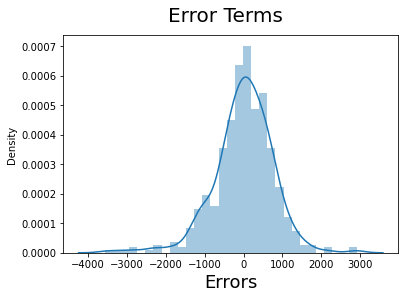

In [49]:
# Residual analysis
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

# plot the residual
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Finding from above graph
Error terms are normally distributed which satisfy the assumption of Linear Regression 

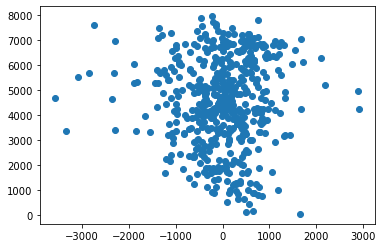

In [50]:
# Homoscedasticity 
plt.scatter(res, y_train_pred)
plt.show()

## Insights from above graph: 
There is no pattern observed in the above graph, hence Homoscedasticity assumption is satisfied

## Prediction and evaluation on the test set

In [51]:
# Rescaling on numeric variables for Test set
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,0,1,0,1.208775,0.047244,-1.395126,6043,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,1.552446,-0.276917,-0.985373,6211,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,-0.080166,1.284930,0.078536,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,1.329807,-1.464502,0.110155,4780,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,1.075935,-2.307309,1.276437,4968,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# Splitting data into y_test and X_test
y_test = df_test.pop('total_count')
X_test = df_test


In [53]:
# adding a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,1.0,0,1,0,1.208775,0.047244,-1.395126,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,1.552446,-0.276917,-0.985373,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,-0.080166,1.284930,0.078536,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,1.329807,-1.464502,0.110155,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,1.075935,-2.307309,1.276437,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# dropping variables whiach are not in final model
X_test_sm = X_test_sm.drop(['weekday_4', 'weekday_3', 'month_11', 'month_12', 'weekday_5', 'month_7',
                            'weekday_2', 'month_2', 'holiday', 'month_4', 'weekday_1', 'month_6',
                            'month_5', 'month_3', 'season_3'], axis=1)
X_test_sm.head()

,const,year,workingday,atemp,humidity,windspeed,season_2,season_4,weekday_6,weathersit_2,weathersit_3,month_8,month_9,month_10
184,1.0,0,0,1.208775,0.047244,-1.395126,0,0,0,1,0,0,0,0
535,1.0,1,1,1.552446,-0.276917,-0.985373,1,0,0,0,0,0,0,0
299,1.0,0,1,-0.080166,1.284930,0.078536,0,1,0,1,0,0,0,1
221,1.0,0,1,1.329807,-1.464502,0.110155,0,0,0,0,0,1,0,0
152,1.0,0,1,1.075935,-2.307309,1.276437,1,0,0,0,0,0,0,0


In [55]:
# predict
y_test_pred = lr_model.predict(X_test_sm)


In [56]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8179087335460093

## Building model using RFE

In [57]:
# importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# reading the data
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [59]:
# dropping columns which are not needed in analysis
bikes = bikes.drop(['instant','dteday','casual','registered'],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
# Renaming few columns for better understanding 
bikes.rename(columns={'yr':'year','mnth':'month','hum':"humidity",'cnt':'total_count'}, inplace=True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [61]:
# Getting the dummy variables for categorical variables
bikes = pd.get_dummies(bikes, columns= ['season','weekday','weathersit','month'], drop_first=True) 
bikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# dropping temp as it is very high correlated with atemp

bikes = bikes.drop(['temp'], axis = 1)
bikes.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# splitting data into train and test
df_train,df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [64]:
# Rescaling on numeric variables: Min-Max scaling
scaler = StandardScaler()
num_vars = ['atemp','humidity','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1,0,1,1.193181,0.515796,-0.331282,7216,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,-0.349583,-0.070634,-0.386359,4066,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,-1.474112,-1.046051,2.017388,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,-0.572197,-1.001847,-0.780539,4220,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,-0.915819,0.695551,0.354275,1683,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
# Splitting predictors and target variable

y_train = df_train.pop('total_count')
X_train = df_train

In [66]:
# Running RFE with 10 output variable
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)


In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', False, 14),
 ('windspeed', False, 11),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 15),
 ('weekday_2', False, 16),
 ('weekday_3', False, 18),
 ('weekday_4', False, 19),
 ('weekday_5', False, 17),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_2', False, 10),
 ('month_3', False, 6),
 ('month_4', False, 7),
 ('month_5', False, 4),
 ('month_6', False, 5),
 ('month_7', False, 8),
 ('month_8', False, 2),
 ('month_9', True, 1),
 ('month_10', False, 3),
 ('month_11', False, 12),
 ('month_12', False, 13)]

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'atemp', 'season_2', 'season_3', 'season_4',
       'weekday_6', 'weathersit_2', 'weathersit_3', 'month_9'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['holiday', 'humidity', 'windspeed', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

### Building model using statsmodel for detailed statistics

In [70]:
# creating X_train dataset with RFE selected features
X_train_rfe = X_train[col]

# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Running linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [71]:
# to see summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.13e-181
Time:                        14:36:38   Log-Likelihood:                -4143.5
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2484.4408    135.921     18.279   

In [72]:
vif = pd.DataFrame()
X_train_new = X_train_rfe.drop(['const'], axis=1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_3,3.82
1,workingday,3.49
2,atemp,2.22
3,season_2,2.13
0,year,1.87
5,season_4,1.67
6,weekday_6,1.56
7,weathersit_2,1.56
9,month_9,1.26
8,weathersit_3,1.08


## Findings from RFE
The r2 value of top 10 feature is 0.824

In [73]:
# Residual analysis on train data
y_train_total_count =lm.predict(X_train_rfe)


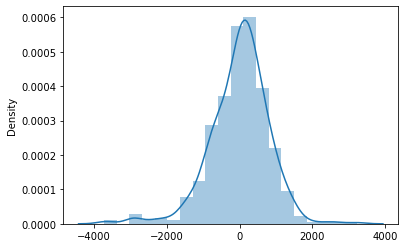

In [74]:
fig = plt.figure()
sns.distplot((y_train-y_train_total_count), bins=20)
plt.show()

## Making Predictions

In [75]:
# Applying scaling on the test set
num_vars = ['atemp', 'humidity', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,0,1,0,1.208775,0.047244,-1.395126,6043,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,1.552446,-0.276917,-0.985373,6211,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,-0.080166,1.284930,0.078536,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,1.329807,-1.464502,0.110155,4780,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,1.075935,-2.307309,1.276437,4968,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# Dividing into X_test and y_test
y_test = df_test.pop('total_count')
X_test = df_test


In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

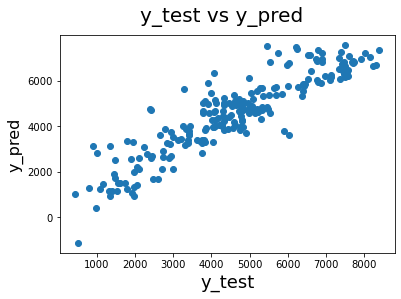

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [80]:
# evaluate
r2_score(y_true=y_test, y_pred=y_pred)

0.8147606358226238